In [2]:
#!/usr/bin/env python3
import vcstring
import pandas as pd
import numpy as np

In [3]:
def getDownLoadedFileName(driver, waitTime):
    # from selenium.webdriver.support.ui import WebDriverWait
    import time
    driver.get("about:downloads")
    endTime = time.time()+waitTime
    while True:
        try:
            fileName = driver.execute_script("return document.querySelector('#contentAreaDownloadsView .downloadMainArea .downloadContainer description:nth-of-type(1)').value")
            if fileName:
                return fileName
        except:
            pass
        time.sleep(1)
        if time.time() > endTime:
            break


def read_csv_from_google_drive(url: str):
    import os
    from selenium.webdriver import Firefox
    from selenium.webdriver.firefox.options import Options
    from selenium.webdriver.common.by import By
    opts = Options()
    opts.add_argument('--headless')
    opts.set_preference("browser.download.folderList", 2)
    opts.set_preference("browser.download.manager.useWindow", False)
    opts.set_preference('browser.download.dir', os.getcwd())
    opts.set_preference('browser.helperApps.neverAsk.saveToDisk', 'application/x-gzip, application/gzip, text/csv, text/plain')
    path = 'https://drive.google.com/uc?export=download&confirm=t&id='+url.split('/')[-2]
    with Firefox(options=opts) as driver:
        driver.get(path)
        buttons = driver.find_elements(By.ID, 'uc-download-link')
        buttons[0].click()
        latestDownloadedFilename = getDownLoadedFileName(driver, 180)
        print(f'File is downloaded to {latestDownloadedFilename}')
        return pd.read_csv(latestDownloadedFilename), latestDownloadedFilename


def read_path_file_from_google_drive(url: str):
    path = 'https://drive.google.com/uc?export=download&confirm=t&id='+url.split('/')[-2]
    return pd.read_csv(path, delimiter=r'\s+', comment='#', header=None).to_numpy()

In [5]:
# Read the datasets from my google drive
data, filename = read_csv_from_google_drive('https://drive.google.com/file/d/1LOUBDUB7fCPeHcj6OfwUrGjh3PgJ8Q8p/view?usp=sharing')
display(data)

File is downloaded to dx1.0_dy0.1(1).csv.gz


,step,X,Y
0,0,-2.000000,-2.000000
1,100,-1.986301,-1.649460
2,200,-1.983968,-1.387534
3,300,-1.931294,-1.448073
4,400,-2.016344,-1.268736
...,...,...,...
1999996,199999600,1.659937,1.994059
1999997,199999700,1.792839,2.139609
1999998,199999800,1.733888,2.260738
1999999,199999900,1.879895,2.249606


In [6]:
ccvsm = vcstring.vcstring(state_assignment='ellipse', num_basis=20, ra_A=0.5, ra_B=0.2, rb_A=0.5, rb_B=0.2, alpha_deg_A=45.0, alpha_deg_B=45.0, x0_A=-2.0, y0_A=-2.0, x0_B=2.0, y0_B=2.0, output_prefix='output_1_0.1/')

In [4]:
initial_path = read_path_file_from_google_drive('https://drive.google.com/file/d/1MZdaUQ4Kg_C3BWkIFjD8wCZk1ajpjzRp/view?usp=sharing')
display(initial_path)

array([[-2.09      , -2.03      ],
       [-1.90857741, -1.7755048 ],
       [-1.74257587, -1.51012076],
       [-1.568845  , -1.2491699 ],
       [-1.38868587, -0.99505932],
       [-1.2216749 , -0.73027269],
       [-1.00745904, -0.51063086],
       [-0.71351955, -0.37236074],
       [-0.43000625, -0.21995625],
       [-0.14708568, -0.06778306],
       [ 0.14740096,  0.06787981],
       [ 0.42993767,  0.22043685],
       [ 0.71386949,  0.37242283],
       [ 1.00800539,  0.51049653],
       [ 1.22217154,  0.73018808],
       [ 1.3885536 ,  0.9956036 ],
       [ 1.56912421,  1.24930272],
       [ 1.74306714,  1.51004152],
       [ 1.90844826,  1.77604597],
       [ 2.09      ,  2.03      ]])

In [7]:
final_path = ccvsm.montecarlo(images=list(range(0, len(initial_path))), traj=data[['step', 'X', 'Y']].to_numpy().tolist(), tau=10, z=initial_path, target=0.1)


MONTE CARLO SAMPLING

MONTE CARLO PARAMETERS
-------------------------
Target for accept/reject: 0.1
Step change in position: 0.01
Number of MC steps per image: 100
lag time: 10
Input positions:
 [[-2.09       -2.03      ]
 [-1.90857741 -1.7755048 ]
 [-1.74257587 -1.51012076]
 [-1.568845   -1.2491699 ]
 [-1.38868587 -0.99505932]
 [-1.2216749  -0.73027269]
 [-1.00745904 -0.51063086]
 [-0.71351955 -0.37236074]
 [-0.43000625 -0.21995625]
 [-0.14708568 -0.06778306]
 [ 0.14740096  0.06787981]
 [ 0.42993767  0.22043685]
 [ 0.71386949  0.37242283]
 [ 1.00800539  0.51049653]
 [ 1.22217154  0.73018808]
 [ 1.3885536   0.9956036 ]
 [ 1.56912421  1.24930272]
 [ 1.74306714  1.51004152]
 [ 1.90844826  1.77604597]
 [ 2.09        2.03      ]]

Starting Monte Carlo calculations

IMAGE 0
--------------------
Initial position: [-2.09 -2.03]

CALCULATING MONTE CARLO STEP 0
-------------------------------
Moving position by 0.008200366410906495 , 0.0028987961648124644
New position for image 0 is: -2.08179

In [20]:
print(initial_path)
print(final_path)

[[-2.08179963 -2.0271012 ]
 [-1.90857741 -1.7755048 ]
 [-1.74257587 -1.51012076]
 [-1.568845   -1.2491699 ]
 [-1.38868587 -0.99505932]
 [-1.2216749  -0.73027269]
 [-1.00745904 -0.51063086]
 [-0.71351955 -0.37236074]
 [-0.43000625 -0.21995625]
 [-0.14708568 -0.06778306]
 [ 0.14740096  0.06787981]
 [ 0.42993767  0.22043685]
 [ 0.71386949  0.37242283]
 [ 1.00800539  0.51049653]
 [ 1.22217154  0.73018808]
 [ 1.3885536   0.9956036 ]
 [ 1.56912421  1.24930272]
 [ 1.74306714  1.51004152]
 [ 1.90844826  1.77604597]
 [ 2.09        2.03      ]]
[[-2.08179963 -2.0271012 ]
 [-1.90327031 -1.76702043]
 [-1.73567606 -1.49975696]
 [-1.56050111 -1.23740102]
 [-1.37886979 -0.97949646]
 [-1.2071438  -0.71537353]
 [-0.98078925 -0.49808531]
 [-0.69581086 -0.36284132]
 [-0.41794627 -0.2134696 ]
 [-0.13989772 -0.06447175]
 [ 0.14662922  0.06752429]
 [ 0.42424135  0.2173611 ]
 [ 0.70235886  0.3662613 ]
 [ 0.98762129  0.5009278 ]
 [ 1.21249808  0.72026505]
 [ 1.38236926  0.98573823]
 [ 1.56473283  1.24313289]


In [17]:
def plot_committor_with_string(x, y, committor_values, pmf, strings=None, string_colors=None, save_figure=None):
    import matplotlib
    import matplotlib.pyplot as plt
    from matplotlib.ticker import AutoMinorLocator
    from matplotlib.figure import figaspect
    plt.rcParams.update({
        "pgf.texsystem": "lualatex",
        "font.family": "FreeSans",  # use serif/main font for text elements
        "text.usetex": False,     # use inline math for ticks
        "pgf.rcfonts": False,    # don't setup fonts from rc parameters
        "mathtext.fontset": "stix",
        "axes.labelsize": 28,
        "axes.linewidth": 2.0,
        "font.size": 24,
        "axes.unicode_minus": False,
        "pgf.preamble": '\n'.join([
            "\\usepackage{units}",
            "\\usepackage{metalogo}",
            "\\usepackage{unicode-math}",
            r"\setmathfont{MathJax_Math}",
            #  r"\setmainfont{Arimo}",
        ])
    })
    pmf = pmf - np.min(pmf)
    colormap = matplotlib.colormaps.get_cmap('seismic').copy()
    colormap.set_over(color='lightgrey')
    colormap.set_under(color='lightgrey')
    w, h = figaspect(1/1.1)
    fig = plt.figure(figsize=(w, h), constrained_layout=True)
    binx = len(set(x))
    biny = len(set(y))
    xi = x.reshape(binx, biny)
    yi = y.reshape(binx, biny)
    plt.contour(xi, yi, pmf.reshape(binx, biny), levels=np.linspace(0, 7, 22),
                cmap='turbo', linewidths=1.0, alpha=0.8)
    if committor_values is not None:
        zi = committor_values.reshape(binx, biny)
        eps = 1.0e-16
        cf = plt.contourf(xi, yi, zi, levels=np.linspace(0-eps, 1+eps, 51), cmap=colormap)
        # cf = plt.contourf(xi, yi, zi, levels=51, cmap=colormap)
        plt.contour(xi, yi, zi, levels=[0.5], colors='black', linestyles='dashed')
    if isinstance(strings, list):
        if isinstance(string_colors, list):
            for string, string_color in zip(strings, string_colors):     
                plt.plot(string.T[0], string.T[1], marker='*', markersize=4.0, color=string_color)
        else:
            for string in strings:        
                plt.plot(string.T[0], string.T[1], marker='*', markersize=4.0)
    elif strings is not None:
        if string_colors is not None:
            plt.plot(strings.T[0], strings.T[1], marker='*', markersize=4.0, color=string_colors)
        else:
            plt.plot(strings.T[0], strings.T[1], marker='*', markersize=4.0, color='limegreen')
    ax = plt.gca()
    ax.set_facecolor('lightgrey')
    ax.set_xlim(-5.0, 5.0)
    ax.set_ylim(-5.0, 5.0)
    ax.set_xlabel(r'$x$ (Å)')
    ax.set_ylabel(r'$y$ (Å)')
    ax.tick_params(direction='in', which='major', length=6.0, width=1.0, top=True, right=True)
    ax.tick_params(direction='in', which='minor', length=3.0, width=1.0, top=True, right=True)
    ax.xaxis.get_major_formatter()._usetex = False
    ax.yaxis.get_major_formatter()._usetex = False
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_major_locator(plt.MultipleLocator(2))
    ax.yaxis.set_major_locator(plt.MultipleLocator(2))
    if committor_values is not None:
        clb = plt.colorbar(cf)
        clb.ax.set_title(r'$q(x,y)$', pad=16.0)
        clb.locator = plt.FixedLocator(np.linspace(0, 1, 6))
        clb.update_ticks()
    if save_figure is not None:
        plt.savefig(save_figure, dpi=300, bbox_inches='tight', transparent=False)
    plt.show()
    return

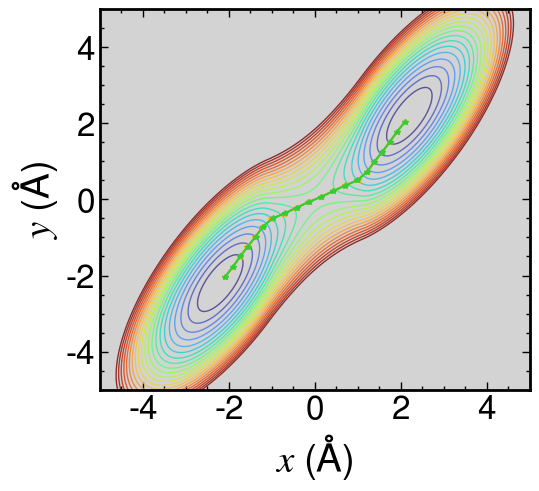

In [19]:
energy_landscape = pd.read_csv('potential_B-S.dat', delimiter=r'\s+', comment='#', header=None)
energy_landscape.columns = ['X', 'Y', 'energy']
plot_committor_with_string(
    energy_landscape['X'].to_numpy(), energy_landscape['Y'].to_numpy(),
    None, energy_landscape['energy'].to_numpy(), [initial_path, final_path],
    ['orange', 'limegreen']
)